# Imports

In [1]:
from WordleBot import WordleBot

In [2]:
# We'll use these for testing strategies
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from time import perf_counter

def performance_plot(num_of_guesses_to_get_answer):
    success_rate = (np.array(num_of_guesses_to_get_answer)<7).sum()/len(num_of_guesses_to_get_answer)
    print('\rSuccess rate: {:.2%}'.format(success_rate))
    print('Median guesses: {:.0f}'.format(np.median(num_of_guesses_to_get_answer)))
    print('Mean guesses: {:.2f}'.format(np.mean(num_of_guesses_to_get_answer)))

    plt.hist(num_of_guesses_to_get_answer,bins=range(1,16),align="left")
    y_max = plt.ylim()[1]
    plt.vlines(7,0,y_max,colors='r')
    plt.xlim([1,15])
    plt.ylim([0,y_max])
    plt.xlabel('Number of guesses')
    plt.ylabel('Occurence')
    plt.title('Histogram of "{}" guesses over entire dictionary'.format(strategy))
    plt.show()


In [3]:
bot = WordleBot()

# Script for testing out strategies

When you initiate WordleBot, you can send the optional argument ```strategy``` which selects a strategy for the guesser. ```strategy``` equals "entropy" by default.

The "entropy" strategy guesses the word that most reduces the entropy in the list of possible words at each stage.  
The "scored" strategy chooses the first possible word from a pre-sorted list of words, ranked according to the occurrence of unique common letters.  
The "random" strategy chooses a random possible word.

### Performance of "entropy" strategy:

In [4]:
strategy = "entropy"

def do_a_wordle(wordle):
    bot = WordleBot(wordle=wordle,strategy=strategy,dark_mode=False)
    
    while not bot.solved:
        bot.filter_possible_words()
        guess = bot.make_guess()
        bot.check_guess(guess)
    return bot.num_of_guesses

In [5]:
pooling=True
n = len(bot.dictionary)
if pooling:
        pool=Pool()
        num_of_guesses_to_get_answer=pool.map(do_a_wordle,bot.wordles)
else:
    num_of_guesses_to_get_answer = []

    i = 0
    for i,wordle in enumerate(bot.dictionary):
        do_a_wordle(wordle)
        print('\r{}/{}'.format(i+1,n),end='')
        num_of_guesses_to_get_answer.append(bot.num_of_guesses)

Success rate: 96.03%
Median guesses: 4
Mean guesses: 4.18


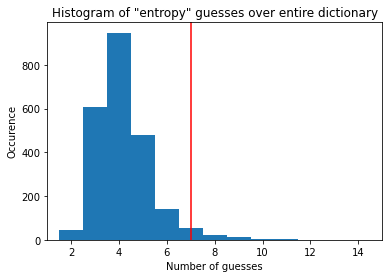

In [6]:
performance_plot(num_of_guesses_to_get_answer)

### Performance of "scored" strategy:

In [13]:
strategy = "scored"

def do_a_wordle(wordle):
    bot = WordleBot(wordle=wordle,strategy=strategy)
    
    while not bot.solved:
        bot.filter_possible_words()
        guess = bot.make_guess()
        bot.check_guess(guess)
    return bot.num_of_guesses

In [14]:
pooling=True
n = len(bot.dictionary)
if pooling:
        pool=Pool()
        num_of_guesses_to_get_answer=pool.map(do_a_wordle,bot.wordles)
else:
    num_of_guesses_to_get_answer = []

    i = 0
    for i,wordle in enumerate(bot.dictionary):
        do_a_wordle(wordle)
        print('\r{}/{}'.format(i+1,n),end='')
        num_of_guesses_to_get_answer.append(bot.num_of_guesses)

Success rate: 90.32%
Median guesses: 4
Mean guesses: 4.68


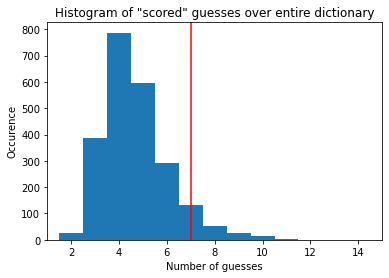

In [15]:
performance_plot(num_of_guesses_to_get_answer)

### Performance of "random" strategy:

In [17]:
strategy = "random"

def do_a_wordle(wordle):
    bot = WordleBot(wordle=wordle,strategy=strategy)
    
    while not bot.solved:
        bot.filter_possible_words()
        guess = bot.make_guess()
        bot.check_guess(guess)
    return bot.num_of_guesses

In [18]:
pooling=True
n = len(bot.dictionary)
if pooling:
        pool=Pool()
        num_of_guesses_to_get_answer=pool.map(do_a_wordle,bot.wordles)
else:
    num_of_guesses_to_get_answer = []

    i = 0
    for i,wordle in enumerate(bot.dictionary):
        do_a_wordle(wordle)
        print('\r{}/{}'.format(i+1,n),end='')
        num_of_guesses_to_get_answer.append(bot.num_of_guesses)

Success rate: 88.12%
Median guesses: 5
Mean guesses: 4.97


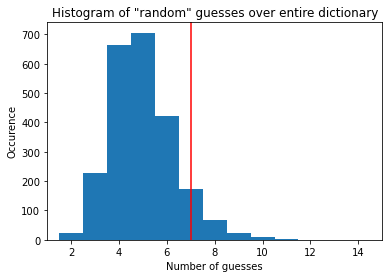

In [19]:
performance_plot(num_of_guesses_to_get_answer)